# Simple LLM Workflow with LangGraph

This notebook demonstrates how to create a **simple LLM-based workflow** using LangGraph and Google's Gemini model. 

## Workflow Overview
We'll build a straightforward Q&A system that:
1. Takes a user question as input
2. Sends it to Google's Gemini LLM for processing
3. Returns the AI-generated answer

This is the simplest possible LLM workflow - a single node that processes questions and generates answers.

## Prerequisites
- Google API key for Gemini model
- `.env` file with `GEMINI_API_KEY` variable

## Import Required Libraries

Let's import all the necessary components:
- **LangGraph**: For building our workflow graph
- **ChatGoogleGenerativeAI**: Google's Gemini model interface
- **TypedDict**: For type-safe state management
- **dotenv**: For loading environment variables securely

In [4]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

## Load Environment Variables

Load the API key from our `.env` file for secure credential management:

In [5]:
load_dotenv()  # Load environment variables from .env file

True

## Initialize the LLM Model

Set up Google's Gemini model with our API key. We're using:
- **gemini-2.5-flash**: Fast, efficient model perfect for Q&A tasks
- **API Key Authentication**: Secure access to Google's services

In [6]:
api_key = os.getenv("GEMINI_API_KEY")

model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    google_api_key=api_key  
)

## Define the State Structure

Our workflow state is simple but effective:
- **question**: The user's input question (string)
- **answer**: The LLM's generated response (string)

This state will flow through our workflow, getting populated as we process the question.

In [ ]:
# create state
class LLMState(TypedDict):
    question: str
    answer: str

## LLM Question-Answer Function

This is our core processing function that:

1. **Extracts the question** from the current state
2. **Creates a prompt** with clear instructions for the LLM
3. **Invokes the Gemini model** to get a response
4. **Updates the state** with the generated answer

The function follows LangGraph conventions by taking and returning the complete state.

In [9]:
def llm_qa(state: LLMState) -> LLMState:
    question = state["question"]

    prompt = f"Answer the following question concisely:\n{question}"
    response = model.invoke(prompt).content
    
    state["answer"] = response
    return state

## Build the Workflow Graph

Now we'll create our LangGraph workflow:

1. **Initialize StateGraph**: Create a graph with our `LLMState` structure
2. **Add Node**: Add our `llm_qa` function as the single processing node
3. **Define Flow**: Connect START → LLM_QA → END
4. **Compile**: Create the executable workflow

This is the simplest possible workflow: a straight line from start to finish with one processing step.

<img src="simple_llm.png">

In [10]:
# create graph

llm_graph = StateGraph(LLMState)

# add nodes
llm_graph.add_node("LLM_QA", llm_qa)


# add edges
llm_graph.add_edge(START, "LLM_QA")
llm_graph.add_edge("LLM_QA", END)

# create workflow
workflow = llm_graph.compile()
 

## Execute the Workflow

Let's test our LLM workflow with a sample question about geography. 

**Test Question**: "What is the capital of France?"

The workflow will:
1. Start with our initial state containing the question
2. Process it through the LLM_QA node
3. Return the final state with both question and answer

In [11]:
# execute workflow
initial_state = { 
    "question": "What is the capital of France?"
}

final_state = workflow.invoke(initial_state)
print(final_state)

{'question': 'What is the capital of France?', 'answer': 'Paris'}


## Visualize the Workflow

Let's see a visual representation of our simple workflow graph:

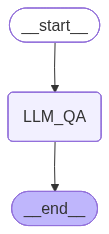

In [12]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())